# Code for debounce button
## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## Load Raleway Font

In [2]:
# Load Raleway font from the specified file path
raleway_path = 'Raleway-Regular.ttf'  # Adjust the path to your font file
raleway_prop = fm.FontProperties(fname=raleway_path)

## Cabling's schematic
<img src="Debouncer.JPG" alt="Debouncer circuit" width="300"/>


## Define Constants

In [3]:
# Define the resistance, capacitance, and input voltage values
R1 = 10e3  # Resistance in ohms (10 kΩ)
R2 = 10e3  # Resistance in ohms (10 kΩ)
C = 1e-6  # Capacitance in farads (1 µF)
Vcc = 5  # Input voltage in volts (5V)

# Compute the RC time constant
tau1 = R1 * C  # Time constant τ = RC
tau2 = R2 * C  # Time constant τ = RC

## Generate Time Vector

In [4]:
# Create a time vector from 0 to 10 times the time constant (with 1000 points)
t = np.linspace(0, 10 * tau1, 1000)

## Compute Output Voltages

### Transfert function
$$
H(s) = \frac{1}{\tau s + 1}
$$

### For a constant input (initial charge at 5V):
$$
u_s(t) = V_{\text{cc}} \cdot e^{-\frac{t}{\tau_1}} 
$$

### For a step input from 0V to 5V at (t= 0):
$$
u_s(t) = V_{\text{cc}} \cdot \left( 1 - e^{-\frac{t}{\tau_2}} \right) 
$$

In [5]:
# Calculate the output voltage for a constant input (initial charge at 5V)
u_s_constant = Vcc * np.exp(-t / tau1)

# Calculate the output voltage for a step input from 0V to 5V at t=0
u_s_step = Vcc * (1 - np.exp(-t / tau2))

## Plot the Graphs

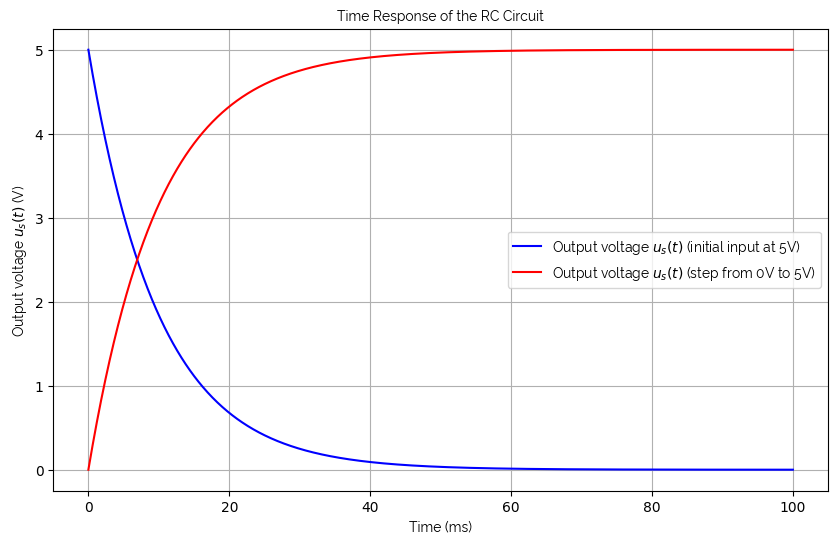

In [6]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Plot both voltage curves: constant input and step response
plt.plot(t * 1e3, u_s_constant, label='Output voltage $u_s(t)$ (initial input at 5V)', color='blue')
plt.plot(t * 1e3, u_s_step, label='Output voltage $u_s(t)$ (step from 0V to 5V)', color='red')

plt.title("Time Response of the RC Circuit", fontproperties=raleway_prop)
plt.xlabel("Time (ms)", fontproperties=raleway_prop)
plt.ylabel("Output voltage $u_s(t)$ (V)", fontproperties=raleway_prop)

# Show the grid
plt.grid(True)

# Add a legend using the Raleway font
plt.legend(prop=raleway_prop)

# Display the final plot
plt.show()